In [14]:
import torch
import random
import numpy as np  # numpy
import torch.nn as nn  # nn objects
import torch.optim as optim  # nn optimizers
import matplotlib.pyplot as plt
%matplotlib notebook

## custom packages ##
from networkUtils import recurrentNet as rn
from taskUtils import generate as gen
from trainUtils import trainer as tn
from testUtils import test, plot

# Set device to gpu if possible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [9]:
# Hyperparameters
input_size = 5
num_classes = 2  # the number of units in the output layer
hidden_size = 10  # the number of units in the recurrent layer
batch_size = 1  # batch size = # of samples to average when computing gradient
num_layers = 1  # number of stacked RNN layers
eta = 0.001  # learning rate
epochs = 500  # epochs = # of full pases through dataset

In [10]:
# creating the networks
# general_net = net1 = net2 = net3 = net4 = rn.RecurrentXORNet(input_size, hidden_size, num_layers, num_classes, batch_size).to(device)
net1 = rn.RecurrentXORNet(input_size, hidden_size, num_layers, num_classes, batch_size).to(device)
net2 = rn.RecurrentXORNet(input_size, hidden_size, num_layers, num_classes, batch_size).to(device)
net3 = rn.RecurrentXORNet(input_size, hidden_size, num_layers, num_classes, batch_size).to(device)
net4 = rn.RecurrentXORNet(input_size, hidden_size, num_layers, num_classes, batch_size).to(device)

# Loss function, optimizer, and schedule (for decaying learning rate)
criterion = nn.CrossEntropyLoss()  # loss function

# general_optimizer = optimizer1 = optimizer2 = optimizer3 = optimizer4 = optim.Adam(general_net.parameters(), eta)  # tells optimizer to adjust all parameter weights with steps based on eta
optimizer1 = optim.Adam(net1.parameters(), eta)  # tells optimizer to adjust all parameter weights with steps based on eta
optimizer2 = optim.Adam(net2.parameters(), eta)  # tells optimizer to adjust all parameter weights with steps based on eta
optimizer3 = optim.Adam(net3.parameters(), eta)  # tells optimizer to adjust all parameter weights with steps based on eta
optimizer4 = optim.Adam(net4.parameters(), eta)  # tells optimizer to adjust all parameter weights with steps based on eta

sheduler1 = optim.lr_scheduler.ReduceLROnPlateau(optimizer1, patience=5, verbose=False) # lowers lr if the loss global min doesn't decrease for 5 epochs
sheduler2 = optim.lr_scheduler.ReduceLROnPlateau(optimizer2, patience=5, verbose=False) # lowers lr if the loss global min doesn't decrease for 5 epochs
sheduler3 = optim.lr_scheduler.ReduceLROnPlateau(optimizer3, patience=5, verbose=False) # lowers lr if the loss global min doesn't decrease for 5 epochs
sheduler4 = optim.lr_scheduler.ReduceLROnPlateau(optimizer4, patience=5, verbose=False) # lowers lr if the loss global min doesn't decrease for 5 epochs

# generate takes in inputs of: same_distractions, input_size, seqlen1, seqlen2, seqlen3
dataset1, targets1, sequence_length1 = gen.generate_dataset(False, input_size, 0, 0, 10) # inputs placed in the beginning
dataset2, targets2, sequence_length2 = gen.generate_dataset(False, input_size, 10, 0, 0) # inputs placed in the end
dataset3, targets3, sequence_length3 = gen.generate_dataset(False, input_size, 0, 5, 5) # inputs placed in the beginning and middle
dataset4, targets4, sequence_length4 = gen.generate_dataset(False, input_size, 5, 0, 5) # inputs placed directly in the middle

In [11]:
# trainer takes in inputs of: network, dataset, targets, sequence_length, input_size, batch_size, epochs, optimizer, criterion, sheduler
print("First network: \n")
loss1 = tn.train_network(net1, dataset1, targets1, sequence_length1, input_size, batch_size, epochs, optimizer1, criterion, sheduler1)
print("\nSecond network: \n")
loss2 = tn.train_network(net2, dataset2, targets2, sequence_length2, input_size, batch_size, epochs, optimizer2, criterion, sheduler2)
print("\nThird network: \n")
loss3 = tn.train_network(net3, dataset3, targets3, sequence_length3, input_size, batch_size, epochs, optimizer3, criterion, sheduler3)
print("\nFourth network: \n")
loss4 = tn.train_network(net4, dataset4, targets4, sequence_length4, input_size, batch_size, epochs, optimizer4, criterion, sheduler4)

First network: 

Cost at epoch 0 is 0.6892209649085999
Cost at epoch 125 is 0.05792649835348129
Cost at epoch 250 is 0.013526851311326027
Cost at epoch 375 is 0.006051467731595039
Cost at epoch 499 is 0.0033756957855075598

Second network: 

Cost at epoch 0 is 0.6977078318595886
Cost at epoch 125 is 0.01940523460507393
Cost at epoch 250 is 0.005293333902955055
Cost at epoch 375 is 0.002443185541778803
Cost at epoch 499 is 0.0013836572179570794

Third network: 

Cost at epoch 0 is 0.7928540706634521
Cost at epoch 125 is 0.04538411647081375
Cost at epoch 250 is 0.006217913702130318
Cost at epoch 375 is 0.0025298637337982655
Cost at epoch 499 is 0.001465915935114026

Fourth network: 

Cost at epoch 0 is 0.6504743695259094
Cost at epoch 125 is 0.028013575822114944
Cost at epoch 250 is 0.006942456588149071
Cost at epoch 375 is 0.0033218550961464643
Cost at epoch 499 is 0.0019666217267513275


<IPython.core.display.Javascript object>


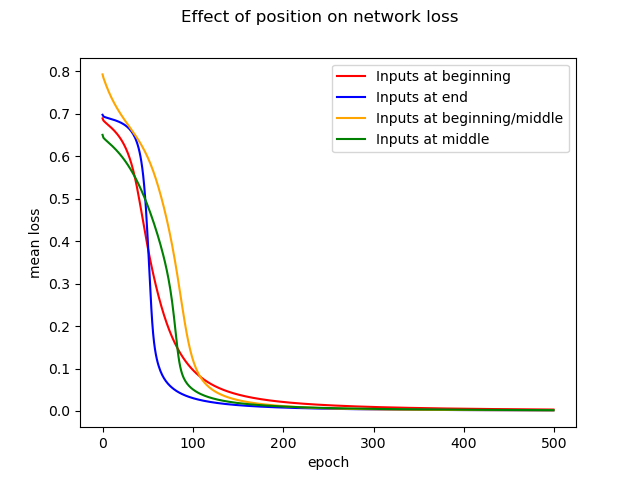

In [15]:
# plot losses
plot.plot_four_losses("Effect of position on network loss", 
                 loss1, loss2, loss3, loss4)
plt.legend(["Inputs at beginning", "Inputs at end", "Inputs at beginning/middle", "Inputs at middle"])
plt.show()

In [13]:
# Tests rounded network outputs against correct network outputs based on sample
# test takes in inputs of: sample_number, dataset, targets, network, input_size, batch_size, sequence_length
test.test_network(random.randint(0, 3), dataset1, targets1, net1, input_size, batch_size, sequence_length1)



Test of network: 
input is [[[1.         0.         0.         0.         0.        ]
  [0.         1.         0.         0.         0.        ]
  [0.43668616 0.7673082  0.84012514 0.5640732  0.4352761 ]
  [0.94785184 0.42793894 0.34107447 0.44238263 0.08561641]
  [0.4927103  0.08987665 0.6556     0.5621677  0.925598  ]
  [0.9761286  0.32388127 0.32130945 0.13655251 0.27816874]
  [0.23840296 0.56231606 0.4050942  0.5852564  0.13534099]
  [0.03026921 0.920193   0.09115297 0.3851757  0.50903916]
  [0.95469576 0.23265988 0.19131315 0.52901834 0.20670015]
  [0.98956895 0.9262979  0.7160284  0.6815566  0.56207716]
  [0.73077315 0.3944326  0.95480293 0.13219595 0.8135844 ]
  [0.5020163  0.19951773 0.60973155 0.2983693  0.4541229 ]]]
out is [[0. 1.]]
expected out is [1. 0.]
